Let's go over the basic analysis. The difference between the original and the modified version of PCIT is that one uses a static set of betas (0 and 1) to construct the logistic regression model for measuring the probability distribution 

## Load the Data Structures, Normalize Weights, Rank Stuff

In [9]:
%plot native

In [1]:
% load data
load('new-1');
new1 = load('new-1');
new45 = load('new-45');
old1 = load('old-1');
old45 = load('old-45');

In [2]:
% normalize weights
new1.weights = exp(new1.weights - logsumexp(new1.weights, 2));
new45.weights = exp(new45.weights - logsumexp(new45.weights, 2));
old1.weights = exp(old1.weights - logsumexp(old1.weights, 2));
old45.weights = exp(old45.weights - logsumexp(old45.weights, 2));

In [3]:
% generate values for plots of curves
resolution = 2;
particles = size(new1.param(:, 1), 1);
xval = 0:(1/10^resolution):1; % This will need to start from zero since we are scaling activations between 0 and 1. So there will definitely be a zero in every analyzes
xval = repmat(xval, new1.particles, 1);
yval = NaN(size(xval));
curvevalues = struct();

y1 = repmat(param(:, 1), 1, size(xval, 2));
x1 = repmat(param(:, 2), 1, size(xval, 2));
x2 = repmat(param(:, 3), 1, size(xval, 2));
y2 = repmat(param(:, 4), 1, size(xval, 2));
y3 = repmat(param(:, 5), 1, size(xval, 2));
y4 = repmat(param(:, 6), 1, size(xval, 2));
if ~all(all(x1 <= x2)), error('Horizontal parameter 1 is NOT <= Horizontal parameter 2 in %s family of curves', curve_type); end

ix3 = xval > x2; % segment #3
yval(ix3) = (((y4(ix3) - y3(ix3)) ./ (1 - x2(ix3))) .* (xval(ix3) - 1)) + y4(ix3);

ix2 = ~ix3 & (xval > x1); % segment #2
yval(ix2) = (((y3(ix2) - y2(ix2)) ./ (x2(ix2) - x1(ix2))) .* (xval(ix2) - x1(ix2))) + y2(ix2);

ix1 = ~ix3 & ~ix2 & xval > 0; % segment #1
yval(ix1) = (((y2(ix1) - y1(ix1)) ./ x1(ix1)) .* xval(ix1)) + y1(ix1);

ix0 = ~ix3 & ~ix2 & ~ix1 & xval == 0; % Intercept (Boundary condition)
yval(ix0) = y1(ix0);

%if any(isnan(yval(:))), error('NaNs in trials x particles matrix!'); end
%if any(isinf(yval(:))), error('Inf in trials x particles matrix!'); end
curvevalues.xval = xval;
curvevalues.yval = yval;
if particles == 1
    curvevalues.curve_params = param;
    curvevalues.title_string = sprintf('y1=%0.2f, x1=%0.2f, x2=%0.2f y2=%0.2f, y3=%0.2f, y4=%0.2f', y1(1), x1(1), x2(1), y2(1), y3(1), y4(1));
end

## Plot the Top and Bottom Five Plots For Each Factor

Identity the indices of the minimum and maximum 5 weights for each condition.

In [4]:
[B, new1min] = mink(new1.weights, 4);
[B, old1min] = mink(old1.weights, 4);
[B, new45min] = mink(new45.weights, 4);
[B, old45min] = mink(old45.weights, 4);
[B, new1max] = maxk(new1.weights, 4);
[B, old1max] = maxk(old1.weights, 4);
[B, new45max] = maxk(new45.weights, 4);
[B, old45max] = maxk(old45.weights, 4);

### Top and Bottom Plots for Fitted Betas And Sigma = 1

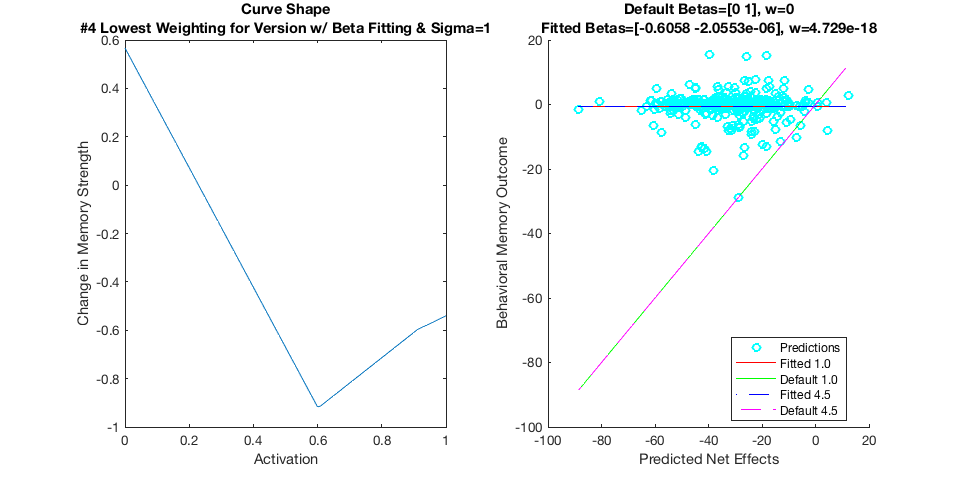

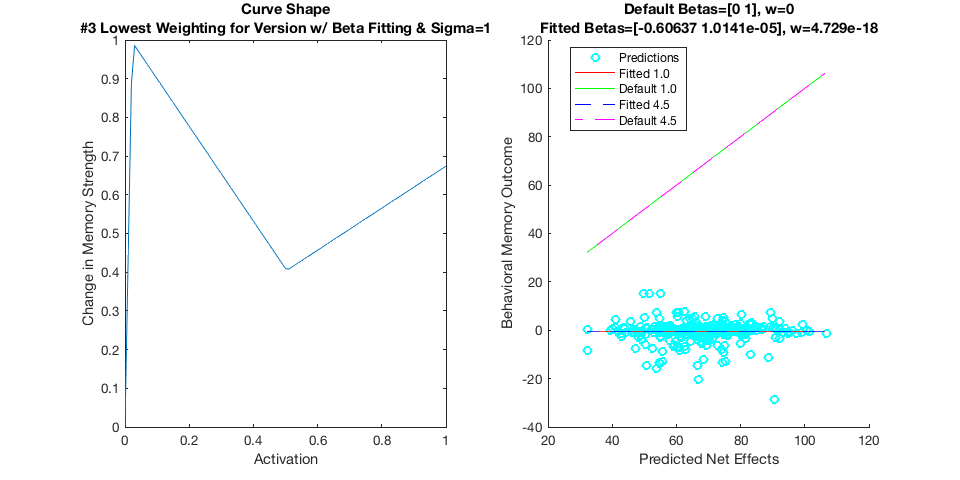

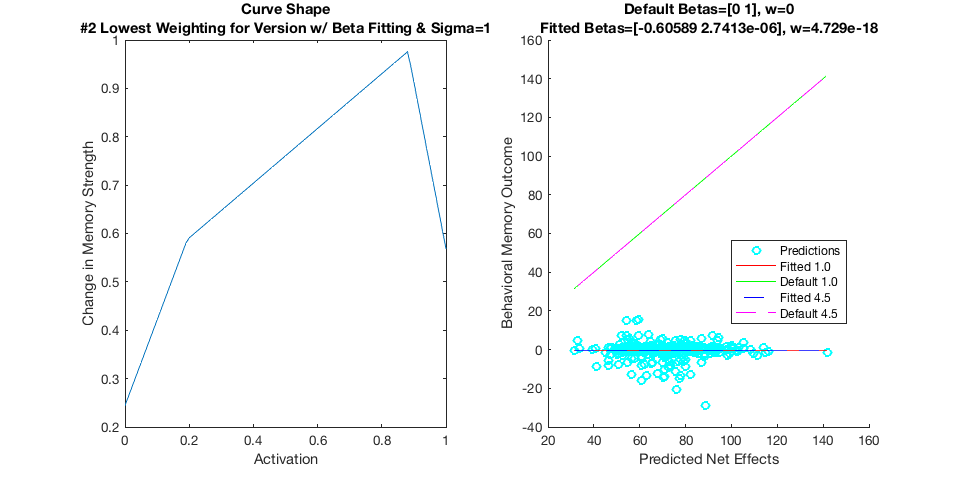

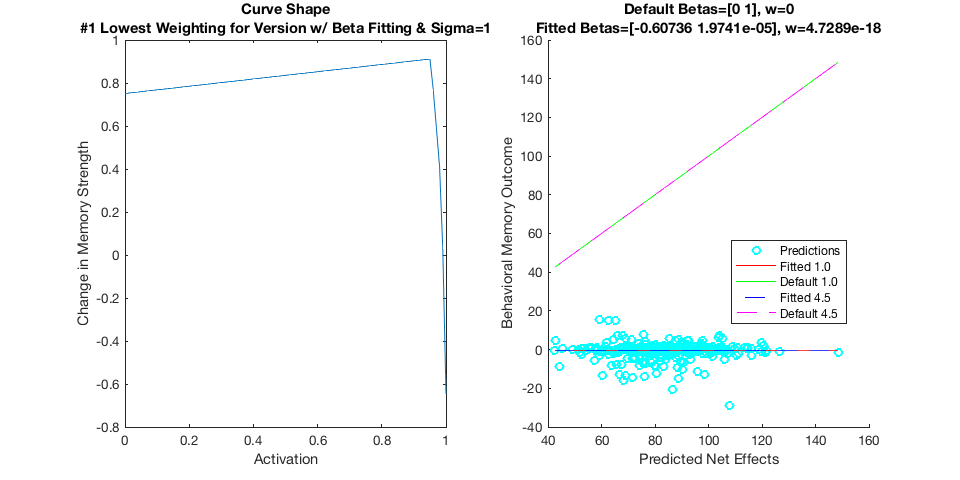

In [9]:
% minimums for new method, sigma=1
for ranking = 1:4
    figure
    index = new1min(ranking);
    
    subplot(1, 2, 1)
    plot(curvevalues.xval(index,:), curvevalues.yval(index,:))
    ylabel('Change in Memory Strength')
    xlabel('Activation')
    title({'Curve Shape', sprintf('#%d Lowest Weighting for Version w/ Beta Fitting & Sigma=1', ranking)})
    
    subplot(1, 2, 2)
    scatter(x(:,index), Y, 'c')
    hold on
    iv = min(x(:,index)):max(x(:,index));
    y1 =  new1.betas(index, 1) + (new1.betas(index, 2)* iv);
    y2 =  old1.betas(index, 1) + (old1.betas(index, 2)* iv);
    y3 =  new45.betas(index, 1) + (new45.betas(index, 2)* iv);
    y4 =  old45.betas(index, 1) + (old45.betas(index, 2)* iv);

    plot(iv, y1, 'r', iv, y2, 'g', iv, y3, 'b--', iv, y4, 'm--')
    ylabel('Behavioral Memory Outcome')
    xlabel('Predicted Net Effects')
    title({sprintf('Default Betas=[0 1], w=%.5g', old1.weights(index)), ...
            sprintf('Fitted Betas=[%.5g %.5g], w=%.5g', new1.betas(index, 1), new1.betas(index, 2), new1.weights(index))})
    legend({'Predictions', 'Fitted 1.0', 'Default 1.0', 'Fitted 4.5', 'Default 4.5'}, 'Location', 'best')
    set(gcf,'PaperUnits','inches','PaperPosition',[0 0 10 5])
end

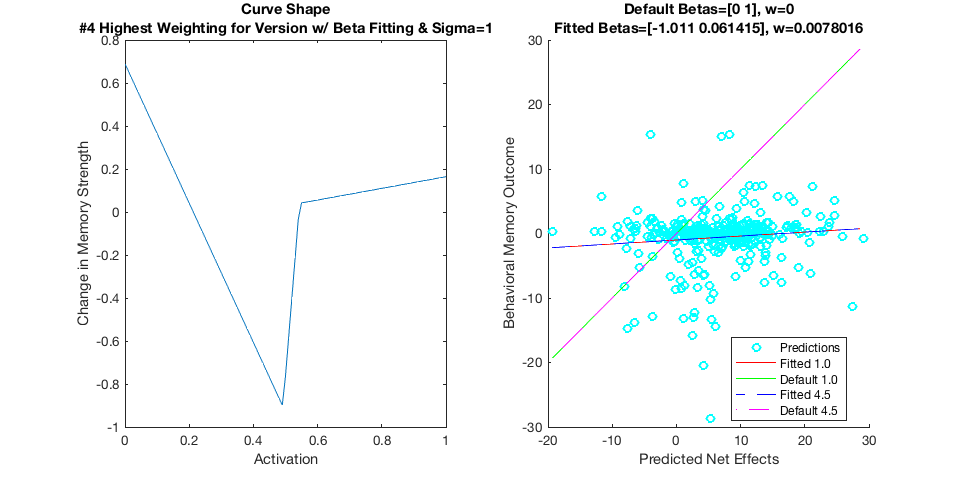

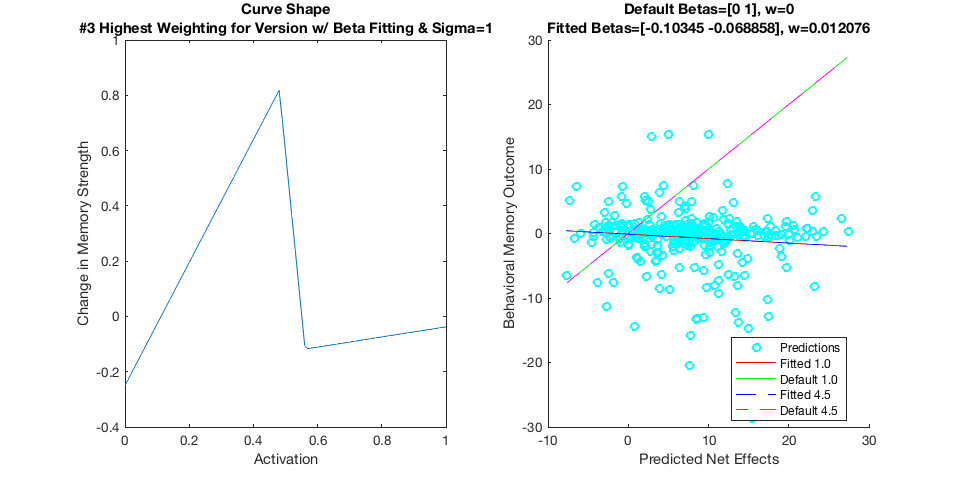

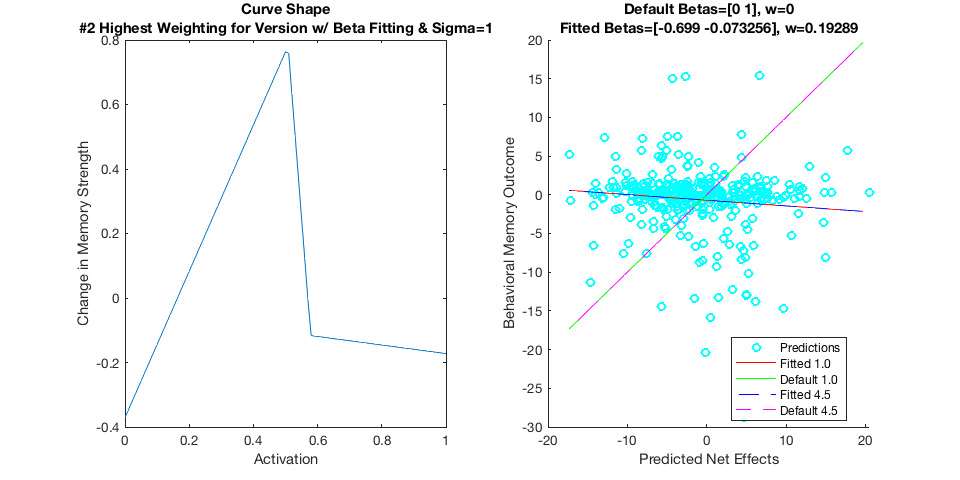

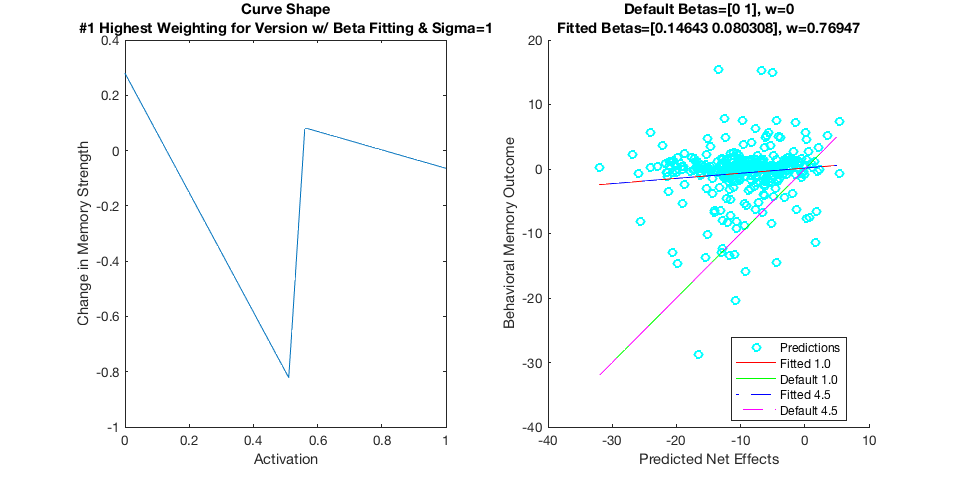

In [10]:
% maximums for new method, sigma=1
for ranking = 1:4
    figure
    index = new1max(ranking);
    
    subplot(1, 2, 1)
    plot(curvevalues.xval(index,:), curvevalues.yval(index,:))
    ylabel('Change in Memory Strength')
    xlabel('Activation')
    title({'Curve Shape', sprintf('#%d Highest Weighting for Version w/ Beta Fitting & Sigma=1', ranking)})
    
    subplot(1, 2, 2)
    scatter(x(:,index), Y, 'c')
    hold on
    iv = min(x(:,index)):max(x(:,index));
    y1 =  new1.betas(index, 1) + (new1.betas(index, 2)* iv);
    y2 =  old1.betas(index, 1) + (old1.betas(index, 2)* iv);
    y3 =  new45.betas(index, 1) + (new45.betas(index, 2)* iv);
    y4 =  old45.betas(index, 1) + (old45.betas(index, 2)* iv);

    plot(iv, y1, 'r', iv, y2, 'g', iv, y3, 'b--', iv, y4, 'm--')
    ylabel('Behavioral Memory Outcome')
    xlabel('Predicted Net Effects')
    title({sprintf('Default Betas=[0 1], w=%.5g', old1.weights(index)), ...
            sprintf('Fitted Betas=[%.5g %.5g], w=%.5g', new1.betas(index, 1), new1.betas(index, 2), new1.weights(index))})
    legend({'Predictions', 'Fitted 1.0', 'Default 1.0', 'Fitted 4.5', 'Default 4.5'}, 'Location', 'best')
    set(gcf,'PaperUnits','inches','PaperPosition',[0 0 10 5])
end

### Top and Bottom Plots for Fitted Betas And Sigma = 4.5

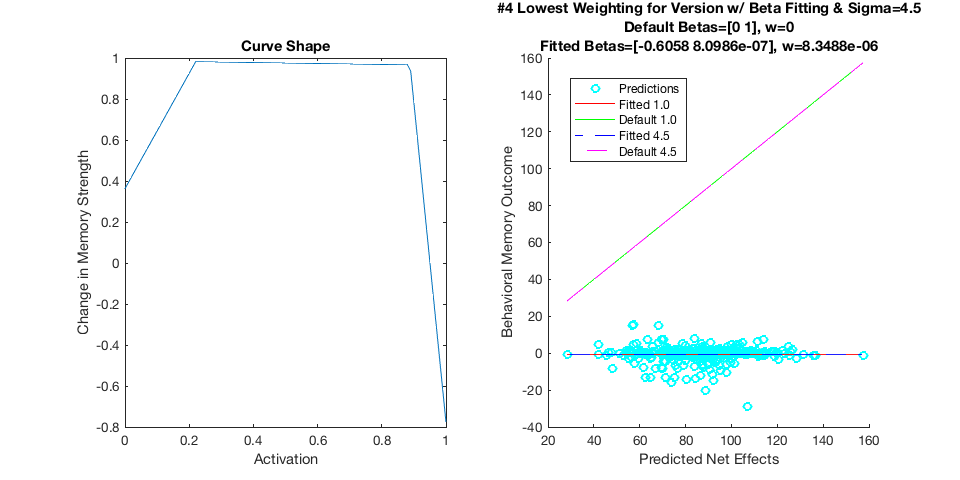

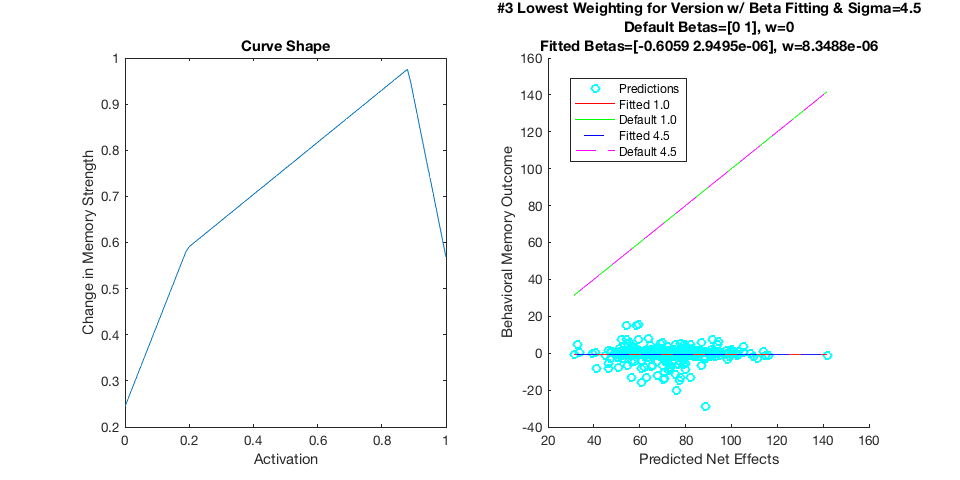

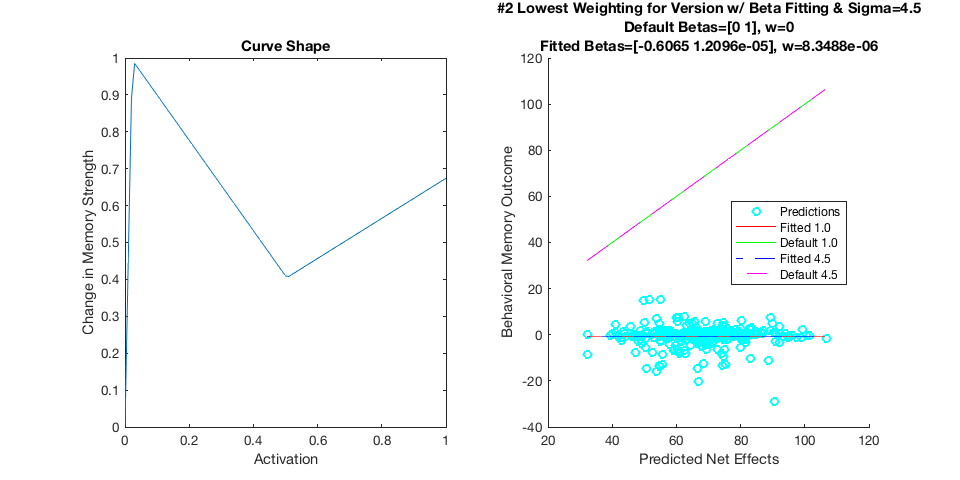

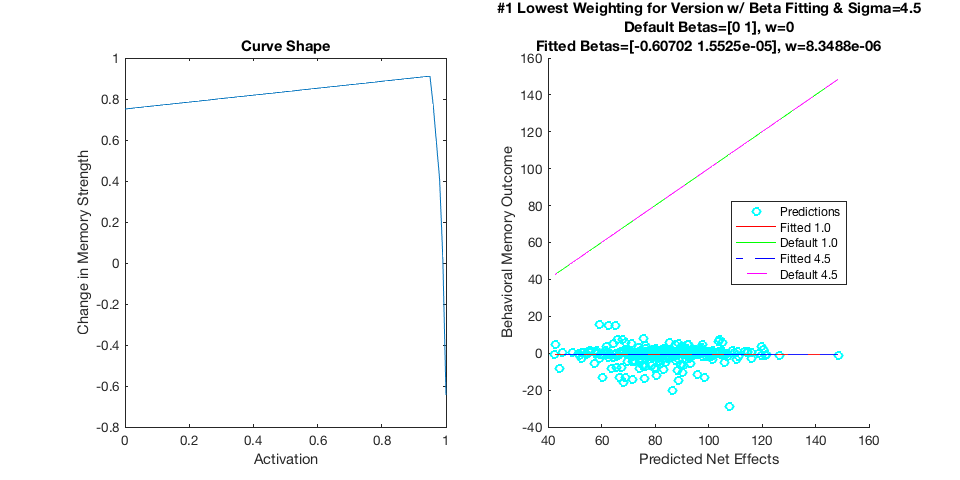

In [13]:
% minimums for new method, sigma=4.5
for ranking = 1:4
    figure
    index = new45min(ranking);
    
    subplot(1, 2, 1)
    plot(curvevalues.xval(index,:), curvevalues.yval(index,:))
    ylabel('Change in Memory Strength')
    xlabel('Activation')
    title('Curve Shape')
    
    subplot(1, 2, 2)
    scatter(x(:,index), Y, 'c')
    hold on
    iv = min(x(:,index)):max(x(:,index));
    y1 =  new1.betas(index, 1) + (new1.betas(index, 2)* iv);
    y2 =  old1.betas(index, 1) + (old1.betas(index, 2)* iv);
    y3 =  new45.betas(index, 1) + (new45.betas(index, 2)* iv);
    y4 =  old45.betas(index, 1) + (old45.betas(index, 2)* iv);

    plot(iv, y1, 'r', iv, y2, 'g', iv, y3, 'b--', iv, y4, 'm--')
    ylabel('Behavioral Memory Outcome')
    xlabel('Predicted Net Effects')
    title({sprintf('#%d Lowest Weighting for Version w/ Beta Fitting & Sigma=4.5', ranking), sprintf('Default Betas=[0 1], w=%.5g', old45.weights(index)), ...
            sprintf('Fitted Betas=[%.5g %.5g], w=%.5g', new45.betas(index, 1), new45.betas(index, 2), new45.weights(index))})
    legend({'Predictions', 'Fitted 1.0', 'Default 1.0', 'Fitted 4.5', 'Default 4.5'}, 'Location', 'best')
    set(gcf,'PaperUnits','inches','PaperPosition',[0 0 10 5])
end

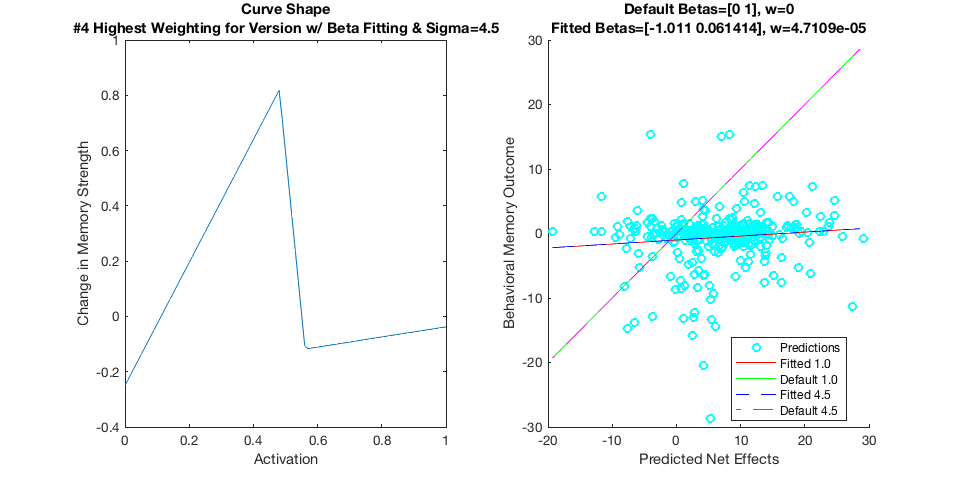

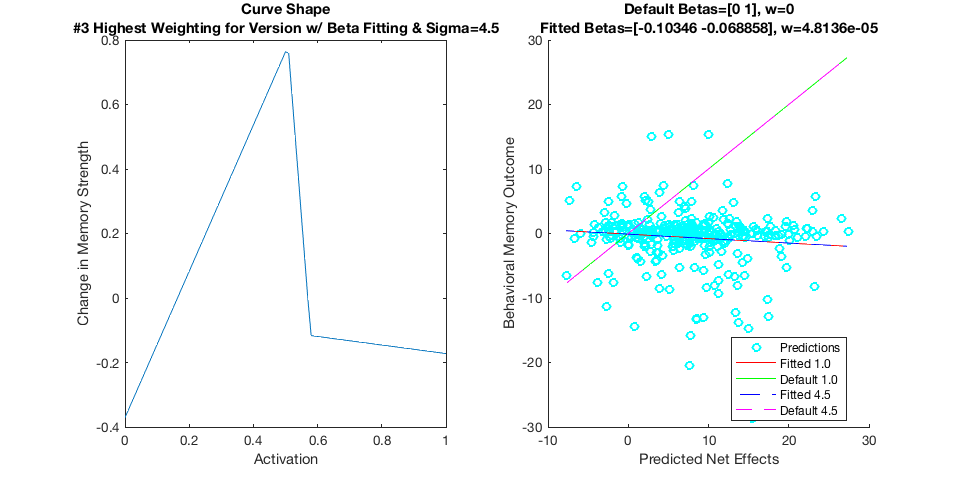

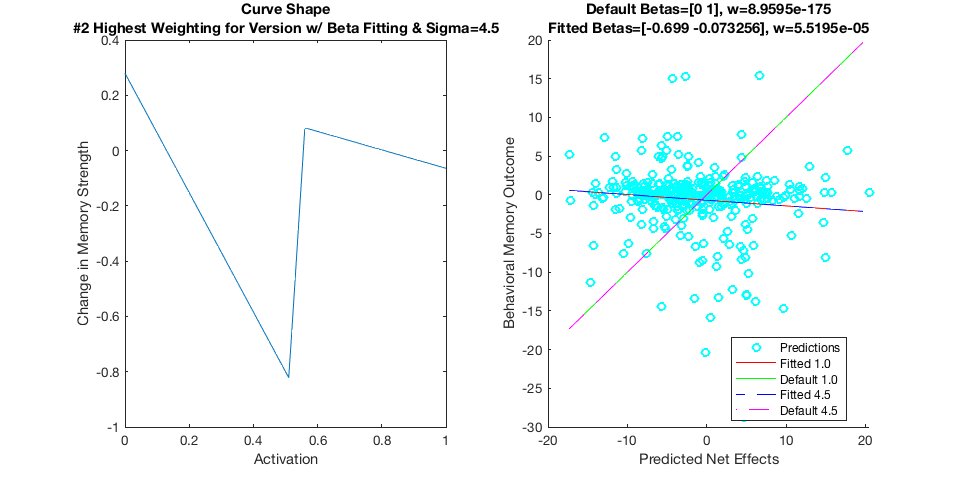

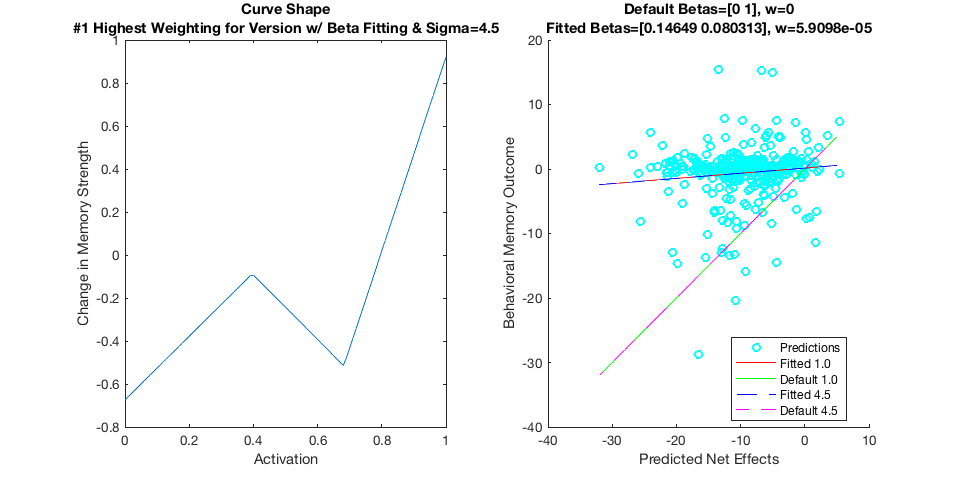

In [18]:
% maximums for new method, sigma=4.5
for ranking = 1:4
    figure
    subplot(1, 2, 1)
    plot(curvevalues.xval(index,:), curvevalues.yval(index,:))
    ylabel('Change in Memory Strength')
    xlabel('Activation')
    title({'Curve Shape', sprintf('#%d Highest Weighting for Version w/ Beta Fitting & Sigma=4.5', ranking)})
    
    subplot(1, 2, 2)
    index = new45max(ranking);
    scatter(x(:,index), Y, 'c')
    hold on
    iv = min(x(:,index)):max(x(:,index));
    y1 =  new1.betas(index, 1) + (new1.betas(index, 2)* iv);
    y2 =  old1.betas(index, 1) + (old1.betas(index, 2)* iv);
    y3 =  new45.betas(index, 1) + (new45.betas(index, 2)* iv);
    y4 =  old45.betas(index, 1) + (old45.betas(index, 2)* iv);

    plot(iv, y1, 'r', iv, y2, 'g', iv, y3, 'b--', iv, y4, 'm--')
    ylabel('Behavioral Memory Outcome')
    xlabel('Predicted Net Effects')
    title({sprintf('Default Betas=[0 1], w=%.5g', old45.weights(index)), ...
            sprintf('Fitted Betas=[%.5g %.5g], w=%.5g', new45.betas(index, 1), new45.betas(index, 2), new45.weights(index))})
    legend({'Predictions', 'Fitted 1.0', 'Default 1.0', 'Fitted 4.5', 'Default 4.5'}, 'Location', 'best')
    set(gcf,'PaperUnits','inches','PaperPosition',[0 0 10 5])
end

### Top and Bottom Plots for Unfitted Betas And Sigma = 1

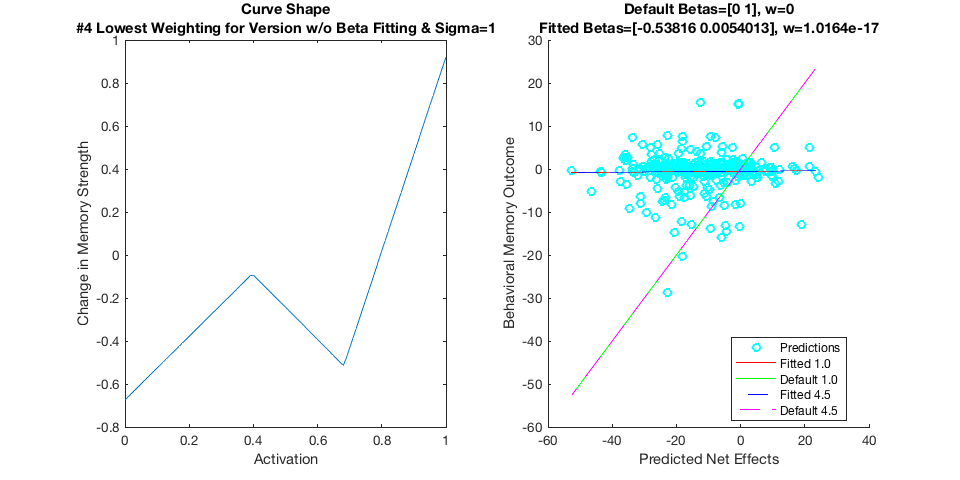

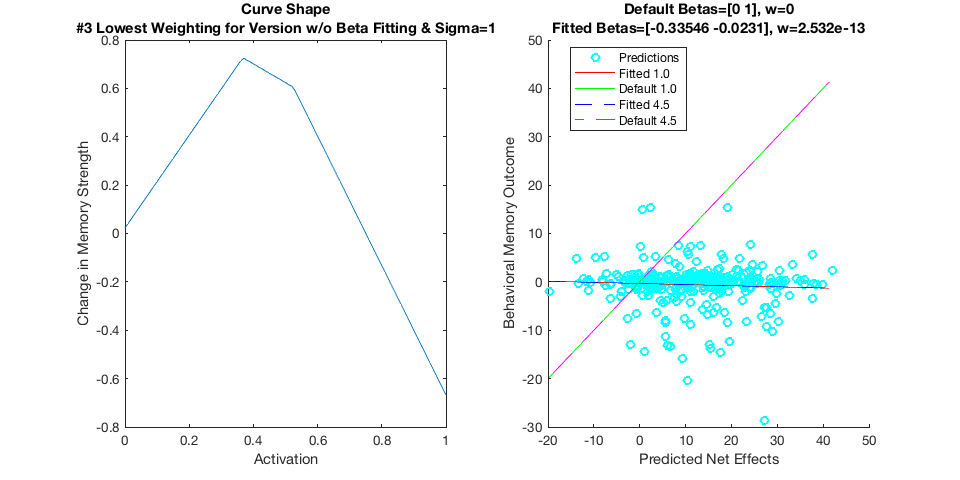

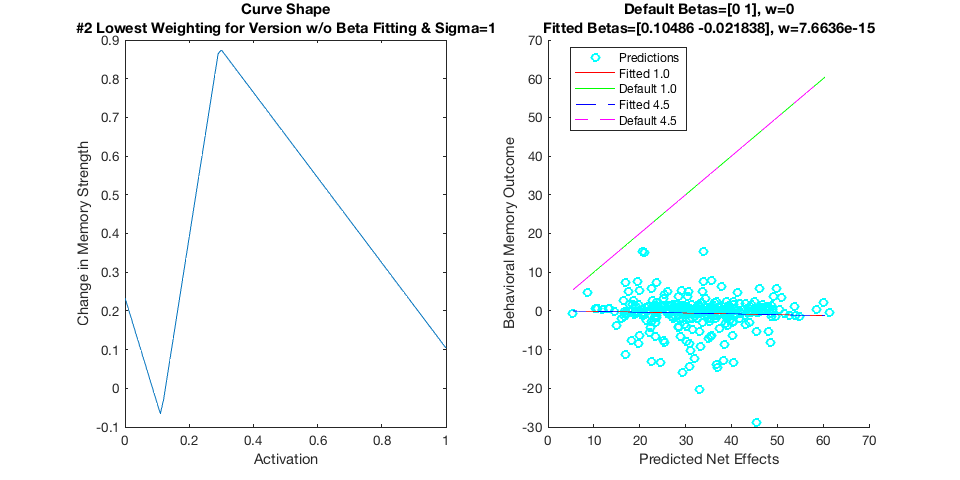

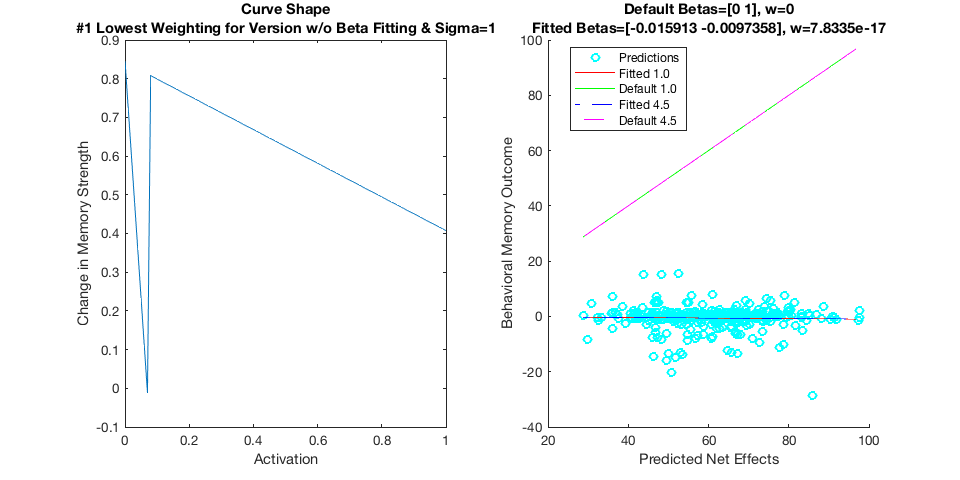

In [17]:
% minimums for old method, sigma=1
for ranking = 1:4
    figure
    index = old1min(ranking);
    subplot(1, 2, 1)
    plot(curvevalues.xval(index,:), curvevalues.yval(index,:))
    ylabel('Change in Memory Strength')
    xlabel('Activation')
    title({'Curve Shape', sprintf('#%d Lowest Weighting for Version w/o Beta Fitting & Sigma=1', ranking),})
    
    subplot(1, 2, 2)
    scatter(x(:,index), Y, 'c')
    hold on
    iv = min(x(:,index)):max(x(:,index));
    y1 =  new1.betas(index, 1) + (new1.betas(index, 2)* iv);
    y2 =  old1.betas(index, 1) + (old1.betas(index, 2)* iv);
    y3 =  new45.betas(index, 1) + (new45.betas(index, 2)* iv);
    y4 =  old45.betas(index, 1) + (old45.betas(index, 2)* iv);

    plot(iv, y1, 'r', iv, y2, 'g', iv, y3, 'b--', iv, y4, 'm--')
    ylabel('Behavioral Memory Outcome')
    xlabel('Predicted Net Effects')
    title({sprintf('Default Betas=[0 1], w=%.5g', old1.weights(index)), ...
            sprintf('Fitted Betas=[%.5g %.5g], w=%.5g', new1.betas(index, 1), new1.betas(index, 2), new1.weights(index))})
    legend({'Predictions', 'Fitted 1.0', 'Default 1.0', 'Fitted 4.5', 'Default 4.5'}, 'Location', 'best')
    set(gcf,'PaperUnits','inches','PaperPosition',[0 0 10 5])
end

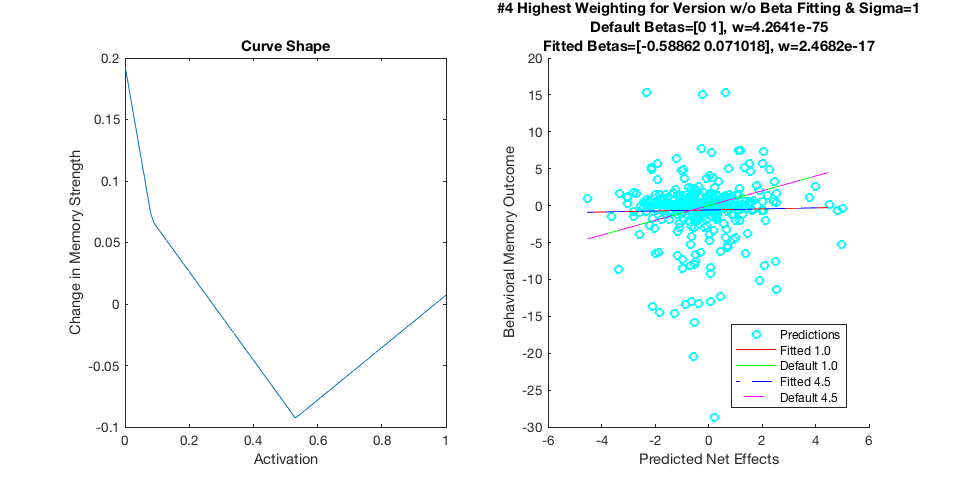

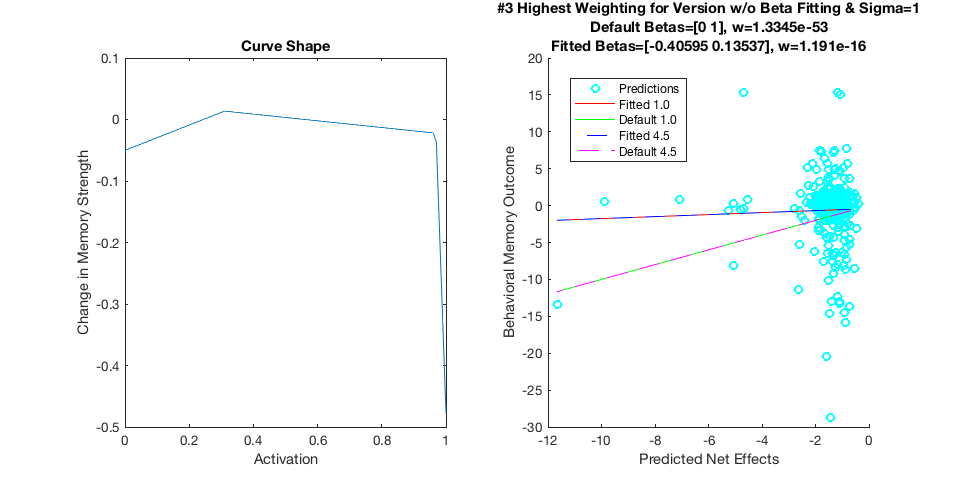

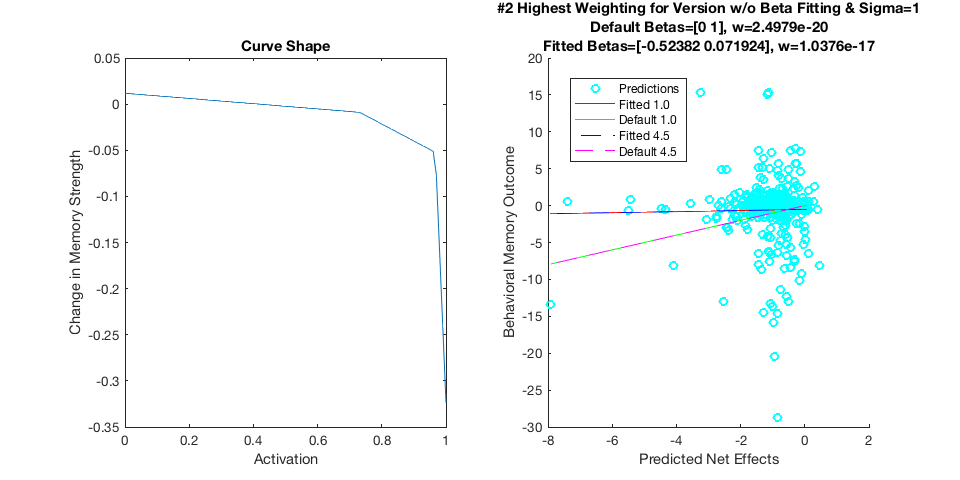

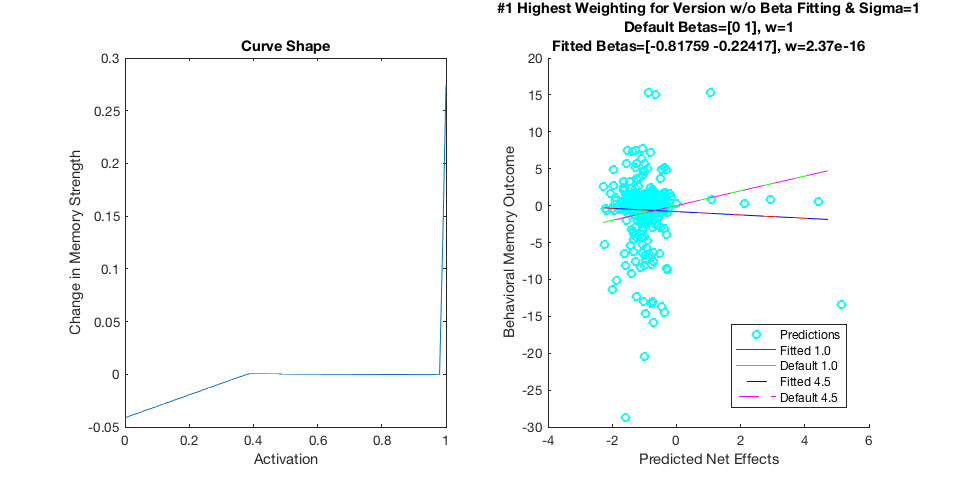

In [19]:
% maximums for old method, sigma=1
for ranking = 1:4
    figure
    index = old1max(ranking);
    subplot(1, 2, 1)
    plot(curvevalues.xval(index,:), curvevalues.yval(index,:))
    ylabel('Change in Memory Strength')
    xlabel('Activation')
    title('Curve Shape')
    
    subplot(1, 2, 2)
    scatter(x(:,index), Y, 'c')
    hold on
    iv = min(x(:,index)):max(x(:,index));
    y1 =  new1.betas(index, 1) + (new1.betas(index, 2)* iv);
    y2 =  old1.betas(index, 1) + (old1.betas(index, 2)* iv);
    y3 =  new45.betas(index, 1) + (new45.betas(index, 2)* iv);
    y4 =  old45.betas(index, 1) + (old45.betas(index, 2)* iv);

    plot(iv, y1, 'r', iv, y2, 'g', iv, y3, 'b--', iv, y4, 'm--')
    ylabel('Behavioral Memory Outcome')
    xlabel('Predicted Net Effects')
    title({sprintf('#%d Highest Weighting for Version w/o Beta Fitting & Sigma=1', ranking), sprintf('Default Betas=[0 1], w=%.5g', old1.weights(index)), ...
            sprintf('Fitted Betas=[%.5g %.5g], w=%.5g', new1.betas(index, 1), new1.betas(index, 2), new1.weights(index))})
    legend({'Predictions', 'Fitted 1.0', 'Default 1.0', 'Fitted 4.5', 'Default 4.5'}, 'Location', 'best')
    set(gcf,'PaperUnits','inches','PaperPosition',[0 0 10 5])
end

### Top and Bottom Plots for Unfitted Betas And Sigma = 4.5

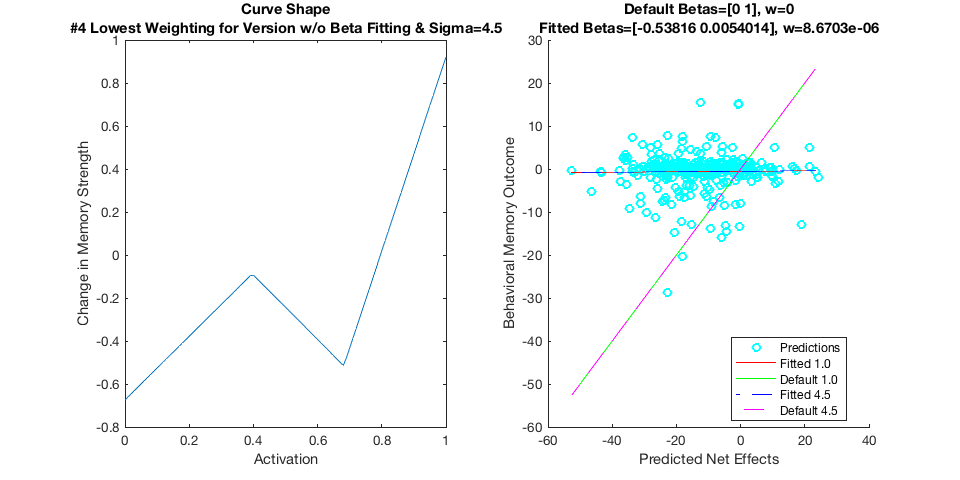

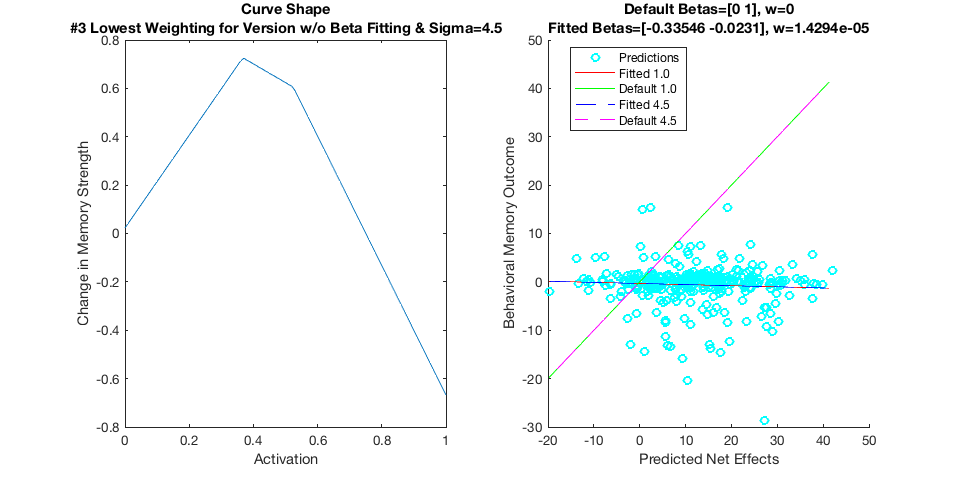

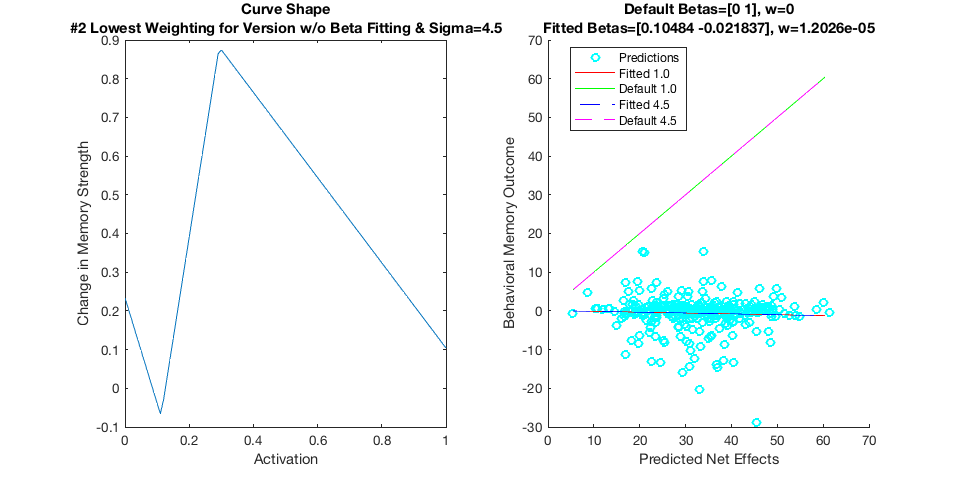

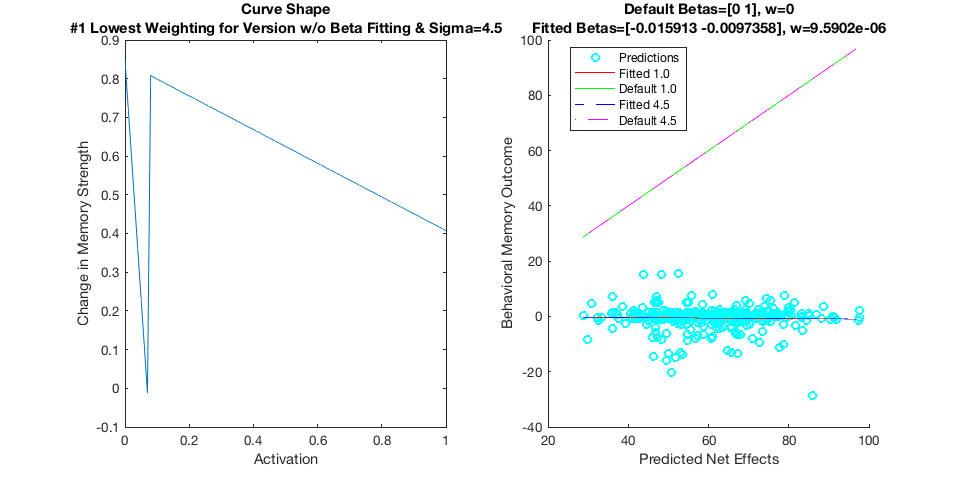

In [21]:
% minimums for old method, sigma=4.5
for ranking = 1:4
    figure
    index = old45min(ranking);
    subplot(1, 2, 1)
    plot(curvevalues.xval(index,:), curvevalues.yval(index,:))
    ylabel('Change in Memory Strength')
    xlabel('Activation')
    title({'Curve Shape', sprintf('#%d Lowest Weighting for Version w/o Beta Fitting & Sigma=4.5', ranking)})
    
    subplot(1, 2, 2)
    scatter(x(:,index), Y, 'c')
    hold on
    iv = min(x(:,index)):max(x(:,index));
    y1 =  new1.betas(index, 1) + (new1.betas(index, 2)* iv);
    y2 =  old1.betas(index, 1) + (old1.betas(index, 2)* iv);
    y3 =  new45.betas(index, 1) + (new45.betas(index, 2)* iv);
    y4 =  old45.betas(index, 1) + (old45.betas(index, 2)* iv);

    plot(iv, y1, 'r', iv, y2, 'g', iv, y3, 'b--', iv, y4, 'm--')
    ylabel('Behavioral Memory Outcome')
    xlabel('Predicted Net Effects')
    title({sprintf('Default Betas=[0 1], w=%.5g', old45.weights(index)), ...
            sprintf('Fitted Betas=[%.5g %.5g], w=%.5g', new45.betas(index, 1), new45.betas(index, 2), new45.weights(index))})
    legend({'Predictions', 'Fitted 1.0', 'Default 1.0', 'Fitted 4.5', 'Default 4.5'}, 'Location', 'best')
    set(gcf,'PaperUnits','inches','PaperPosition',[0 0 10 5])
    end

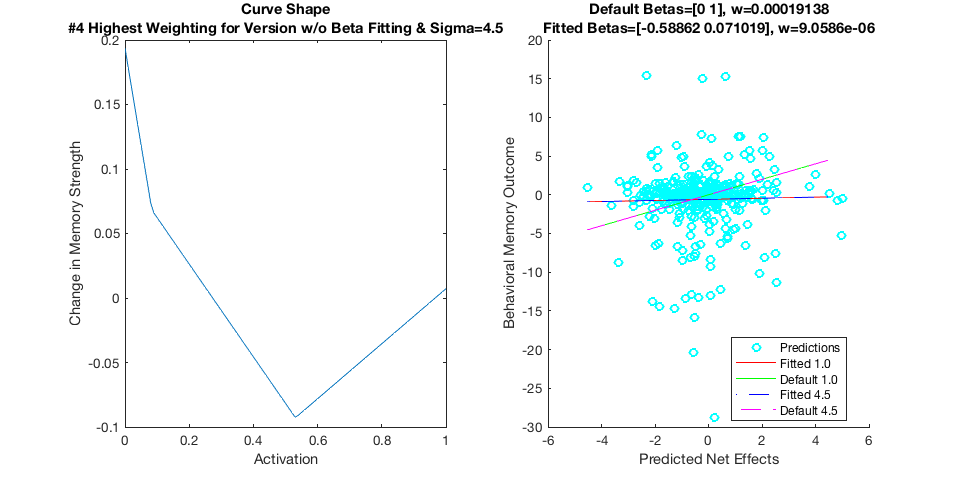

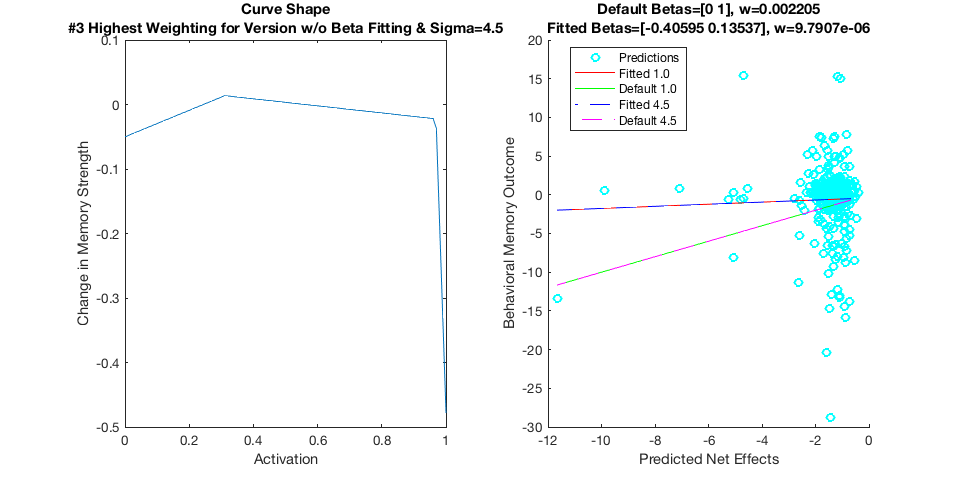

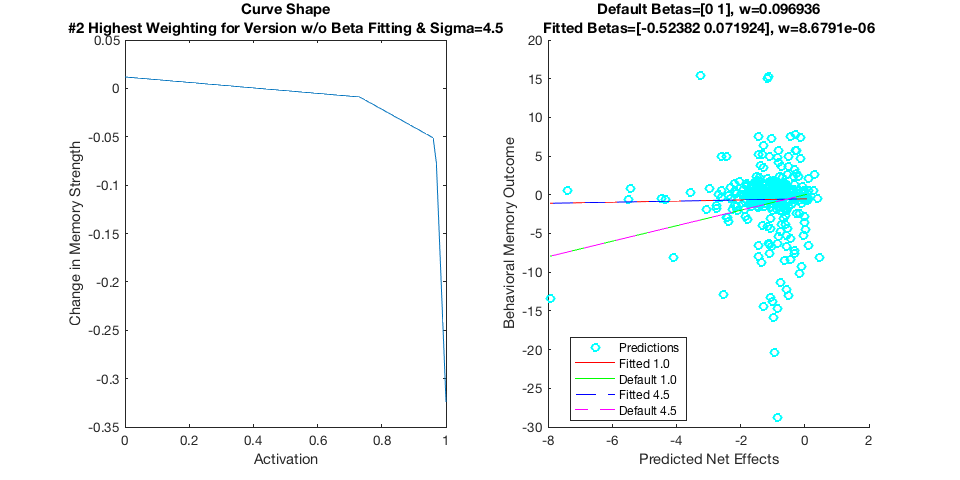

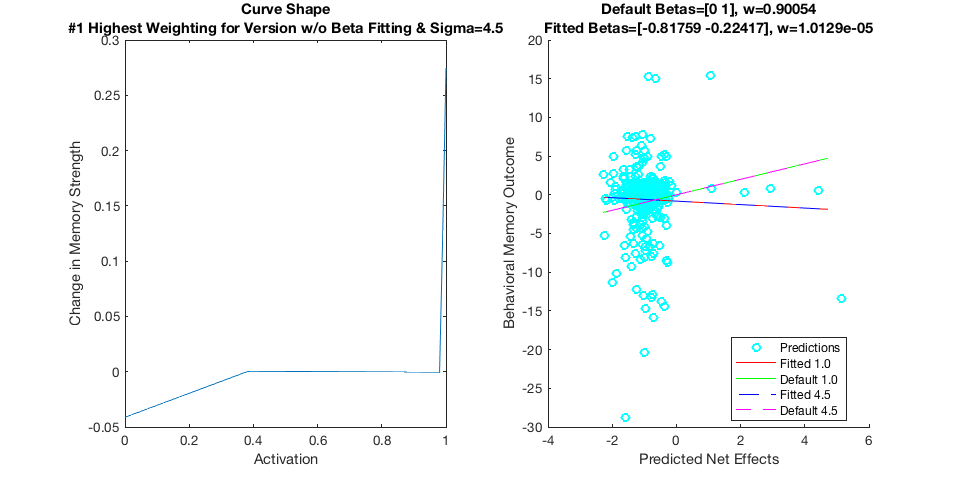

In [23]:
% maximums for old method, sigma=4.5
for ranking = 1:4
    figure
    index = old45max(ranking);
    subplot(1, 2, 1)
    plot(curvevalues.xval(index,:), curvevalues.yval(index,:))
    ylabel('Change in Memory Strength')
    xlabel('Activation')
    title({'Curve Shape', sprintf('#%d Highest Weighting for Version w/o Beta Fitting & Sigma=4.5', ranking)})
    
    subplot(1, 2, 2)
    scatter(x(:,index), Y, 'c')
    hold on
    iv = min(x(:,index)):max(x(:,index));
    y1 =  new1.betas(index, 1) + (new1.betas(index, 2)* iv);
    y2 =  old1.betas(index, 1) + (old1.betas(index, 2)* iv);
    y3 =  new45.betas(index, 1) + (new45.betas(index, 2)* iv);
    y4 =  old45.betas(index, 1) + (old45.betas(index, 2)* iv);

    plot(iv, y1, 'r', iv, y2, 'g', iv, y3, 'b--', iv, y4, 'm--')
    ylabel('Behavioral Memory Outcome')
    xlabel('Predicted Net Effects')
    title({sprintf('Default Betas=[0 1], w=%.5g', old45.weights(index)), ...
            sprintf('Fitted Betas=[%.5g %.5g], w=%.5g', new45.betas(index, 1), new45.betas(index, 2), new45.weights(index))})
    legend({'Predictions', 'Fitted 1.0', 'Default 1.0', 'Fitted 4.5', 'Default 4.5'}, 'Location', 'best')
    set(gcf,'PaperUnits','inches','PaperPosition',[0 0 10 5])
    end

## Aggregate Analyses

### (Sigma = 1.0) Correspondence Between Curves' Weightings Under Static Betas and Under Fitted Betas


r =

    1.0000   -0.0000
   -0.0000    1.0000


p =

    1.0000    0.9968
    0.9968    1.0000



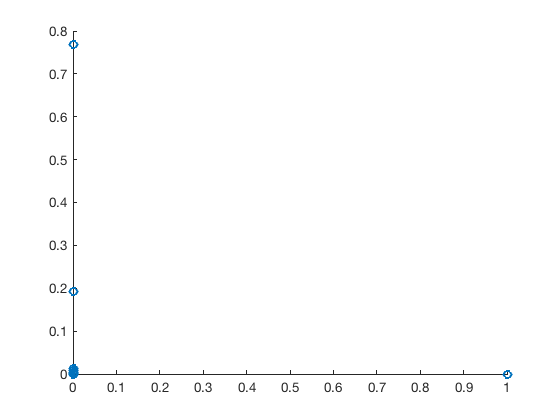

In [42]:
scatter(old1.weights, new1.weights)
[r, p] = corrcoef(old1.weights, new1.weights)

### (Sigma = 4.5) Correspondence Between Curves' Weightings Under Static Betas and Under Fitted Betas


r =

    1.0000   -0.0000
   -0.0000    1.0000


p =

    1.0000    0.9954
    0.9954    1.0000



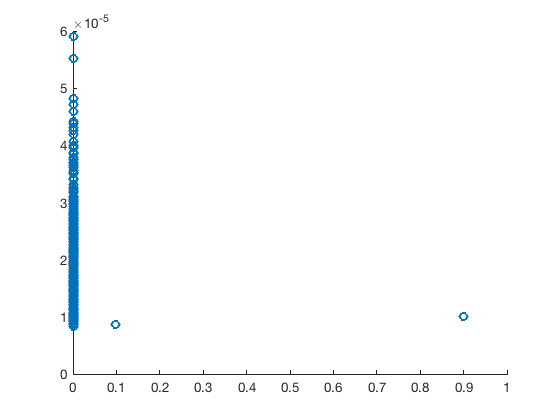

In [43]:
scatter(old45.weights, new45.weights)
[r, p] = corrcoef(old45.weights, new45.weights)

## sigma=1 vs sigma=4.5


r =

    1.0000    0.9943
    0.9943    1.0000


p =

     1     0
     0     1



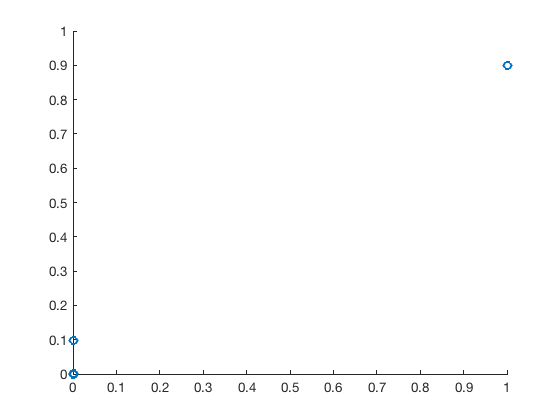

In [44]:
scatter(old1.weights, old45.weights)
[r, p] = corrcoef(old1.weights, old45.weights)


r =

    1.0000    0.0868
    0.0868    1.0000


p =

    1.0000    0.0000
    0.0000    1.0000



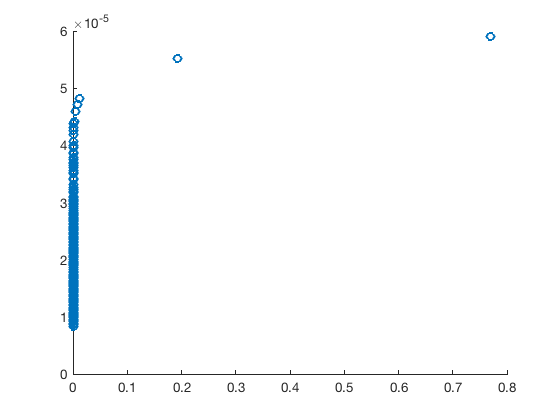

In [45]:
scatter(new1.weights, new45.weights)
[r, p] = corrcoef(new1.weights, new45.weights)

## Again, With Rankings

In [31]:
[~,p] = sort(new1.weights,'descend');
new1r = 1:length(new1.weights);
new1r(p) = new1r;

[~,p] = sort(old1.weights,'descend');
old1r = 1:length(old1.weights);
old1r(p) = old1r;

[~,p] = sort(new45.weights,'descend');
new45r = 1:length(new45.weights);
new45r(p) = new45r;

[~,p] = sort(old45.weights,'descend');
old45r = 1:length(old45.weights);
old45r(p) = old45r;


r =

    1.0000   -0.0004
   -0.0004    1.0000


p =

    1.0000    0.8916
    0.8916    1.0000



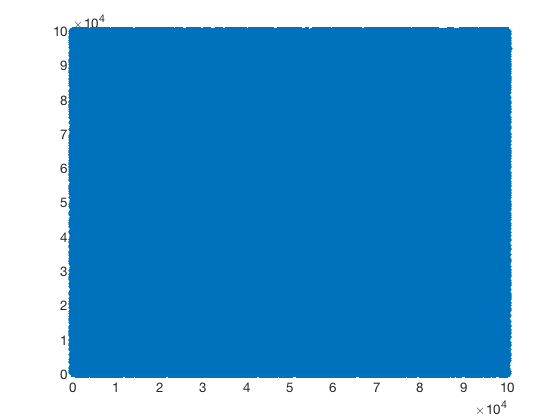

In [46]:
scatter(new1r, old1r)
[r, p] = corrcoef(new1r, old1r)


r =

    1.0000    0.0263
    0.0263    1.0000


p =

    1.0000    0.0000
    0.0000    1.0000



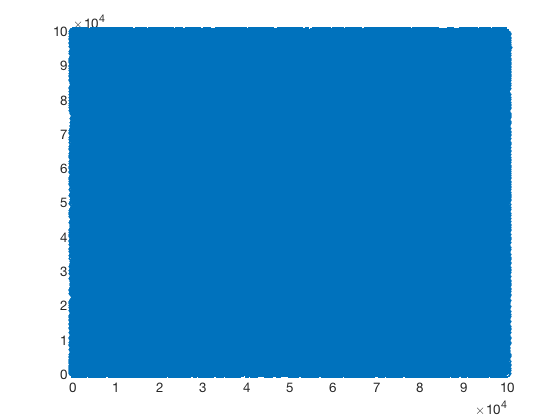

In [47]:
scatter(new45r, old45r)
[r, p] = corrcoef(new45r, old45r)


r =

    1.0000    1.0000
    1.0000    1.0000


p =

     1     0
     0     1



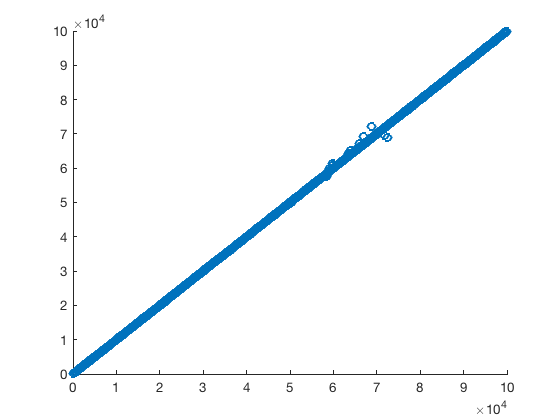

In [48]:
scatter(new1r, new45r)
[r, p] = corrcoef(new1r, new45r)


r =

    1.0000    0.9001
    0.9001    1.0000


p =

     1     0
     0     1



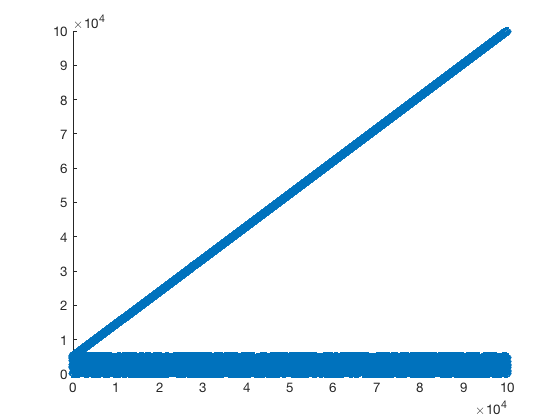

In [49]:
scatter(old1r, old45r)
[r, p] = corrcoef(old1r, old45r)